# Project 1 - Designing a Scheduler Assignment

| ID | Description                | Duration | Dependencies               | Status | Type          | Start Time | Academic & Career Importance | Personal Interest |
|----|----------------------------|----------|----------------------------|--------|---------------|------------|---------------------|-------------------|
| 1  | Reading books              | 1.0      | None                       | N       | Regular       | None       | 2                   | 4                 |
| 2  | CS110 PCW                  | 2.0      | None                       | N       | Regular       | None       | 5                   | 2                 |
| 3  | CS110 class                | 1.5      | Task 2                     | N       | Regular       | 11:00 AM   | 5                   | 2                 |
| 4  | Apply for internship       | 1.0      | None                       | N       | Regular       | None       | 4                   | 3                 |
| 5  | Take shower                | 0.5      | None                       | N       | Regular       | None       | 1                   | 1                 |
| 6  | Tour East Side Gallery     | 2.0      | None                       | N       | City-specific | None       | 1                   | 5                 |
| 7  | Write a reflection of East Side Gallery Tour | 1.0 | Task 6       | N       | City-specific | None       | 1                   | 5                 |
| 8  | CCP meeting with DEGIS     | 0.5      | None                       | N       | City-specific | 1:30 PM    | 5                   | 5                 |


# Task Explanation

### CS110 Class / CCP meeting
- These are tasks with fixed starting times. 
- To assess the functionality of the fixed task priority queue, I deliberately set the utility of the CCP meeting higher than that of the CS110 Class. Since the priority queue for fixed tasks operates based on their starting times, disregarding utility, CS110 Class should be scheduled first by the scheduler.

### CS PCW
- This task represents a non-fixed-timed task that should be completed before a certain fixed-time task (CS110 class), as the latter depends on its completion. This kind of task has the highest utility to place it in the very top of the scheduler in order to prevent a conflict in dependencies (ex. assigned after its dependent fixed time task).
- This task enhances the applicability & versatility of the scheduler, accommodating tasks that lack fixed starting times but still need to be completed before specific events (e.g., cooking before lunch at 11 am).
- If this task cannot be placed before the dependent fixed time task ("CS110 class"), the scheduler will return an error message.

### Tour East Side Gallery
- This task represents a non-fixed time task with dependent non-fixed task (Write a reflection of East Side Gallery Tour), thus having second highest utility among all, after non-fixed time task with fixed task ("CS PCW").

### Write a reflection of East Side Gallery Tour
- This task represents a task that is dependent on non-fixed time task, having second highest utility

### Reading Books / Apply for Internship / Take Shower
- These tasks represent independent tasks with varying levels of academic and career importance, as well as personal interest.
- In a real-world context, these tasks are not dependent, or have tasks dependent on them, so they can be scheduled after fixed-time tasks, and tasks with dependents are assigned to the scheduler.


# Algorithmic Strategy
## Priority Queue
The reasons behind using a priority queue over other data structures are closely related to the nature of the scheduler.

1. A priority queue is better at handling streaming input compared to other data structures like lists. If we are adding a new task to the scheduler, a priority queue can insert new tasks in O(logn) time (for a binary heap implementation), which is more efficient than re-sorting a list every time a new task is added, which would be O(nlogn) for each insertion.
2. When we use a priority queue, the ordering can be based on various criteria, such as utility calculation or starting time. This characteristic is especially important because I am using two heaps with different priority criteria. For the fixed-time task heap, it considers the starting time to determine priority. For the non-fixed-time task heap, it uses utility to determine priority. Likewise, although the tasks fall under the "Task" class, depending on which heap they are in, the ordering criteria change.

# General explanation

My scheduler algorithm works as following:

### Step 1: Define Priority Queues 
I am creating two priority queues, one for fixed-time tasks and one for non-fixed-time tasks.
For fixed-time tasks, the priority within this queue is based on the start time; the earlier the start time, the higher the priority.
For non-fixed-time tasks, the priority in this queue is based on a utility score. The utility score determines the order, with higher scores indicating higher priority.

### Step 2: Populate the Priority Queues for Fixed-Time Tasks
For Fixed-Time Tasks: Place all tasks with a specified start time (tasks that have a "start time" value) into the fixed-time tasks queue, ordered by their start times.

### Step 3. Schedule Fixed-Time Tasks
Get tasks from the fixed-time tasks queue in order of their start times and schedule them into the scheduler.
Check whether it starts after the given starting time. If so, cancel the task.

### Step 4: Populate the Priority Queues for Non-Fixed-Time Tasks based on Utility Equation
Assign a utility score to each task that lacks a specific start time (tasks that do not have a "start time" value) and insert them into the non-fixed-time task queue. Utility calculation is done after scheduling fixed-time tasks as we have to know their priority. The utility score is determined by the formula: 3 * academic_career_importance + 1 * personal_interest + 1000 * sum of priority of fixed tasks dependent on this task + 50 * number of non-fixed tasks dependent on this task. This score reflects the task's importance in terms of academic and career goals, personal interest, and its dependencies on other tasks.

The utility score is designed to prioritize tasks by considering these elements in this following order: 1) sum of dependent fixed tasks' priorities (x1000 weight), 2) number of dependent non-fixed tasks (x50 weight), 3) academic and professional importance(x3 weight), and 4) personal interest (x1 weight). The maximum sum of academic importance and personal interest is 20 (5*3 + 5*1), so the number of dependent non-fixed tasks is more prioritized than academic importance & personal interest.

This also ensures that the flexible task with dependent task to be performed first. For instance, if “CS110 PCW” and “AH112 PCW” are equivalent in terms of dependencies, academic and career importance, and personal interest, the task with a higher priority (earlier start time) dependent fixed task will be prioritized. In other words, if “CS110 class” (dependent on “CS110 PCW”) starts earlier than “AH112 class” (dependent on “AH112 PCW”), “CS110 PCW” will have a higher utility and will be executed first. It's important to note that the sum of priorities is computed such that higher priority tasks receive larger numerical values (e.g., in a scenario with two tasks, the first priority ("CS110 class") is valued at 2 and the second ("AH112 class") at 1). Furthermore, the utility score is based on the number of non-fixed tasks dependent on the tasks; the tasks with more tasks dependent on them should be prioritized to complete the task on time. Lastly, the weight assigned to academic and career importance is greater than personal interest, reflecting my current focus on career development.


### Step 4: Schedule Non-Fixed-Time Tasks
From a given starting time (e.g., 8am), start scheduling non-fixed-time tasks considering the fixed-time tasks. The task with the higher priority (higher utility) will be assigned first in the non-fixed-time tasks queue to the scheduler.

The scheduler finds the earliest available time slot that accommodates the task's duration by checking whether the starting time and ending time of the scheduled task conflicts with the current task. If so, change the starting time of a task to the ending time of the conflicting task, until it finds a time slot that does not conflict with already assigned tasks.

### Step 5: Check Dependencies and Return the Scheduler
Since the prior step does not check whether scheduling non-fixed-time tasks aligns with the dependencies, after scheduling all the tasks, check whether each task's dependencies are completed. If there is no problem, return the final scheduler. If there is any issue in dependency, return the scheduler and state which tasks are conflicting.

# Python implementation

## Max heapq code

##### Note: I am using a max heap for both heaps (fixed and flexible tasks) because it compares "priorities". For fixed task queue, higher priority is defined as a lower starting time value (int), as specified in the Task class's __lt__ method.

In [35]:
class MaxHeapq:
    """ 
    A class that implements properties and methods 
    that support a max priority queue data structure

    Attributes
      ----------
      heap : arr
        A Python list where key values in the max heap are stored
    heap_size: int
        An integer counter of the number of keys present in the max heap
    """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node
        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node
        """
        return 2 * i + 2
        
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node
        """

        return (i - 1)//2
     
  
    def heappush(self, task):  
        """
        Insert a task into the priority queue 
        
        Parameters
        ----------
        task: Task
            The task object to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(task)
        self.heap_size += 1
        i = self.heap_size - 1
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            self.heap[self.parent(i)], self.heap[i] = self.heap[i], self.heap[self.parent(i)]
            i = self.parent(i)
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        returns the larest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk
    
    def __len__(self):
        return self.heap_size

## Test Cases

### Test Case 1: Inserting Tasks into the Priority Queue

In [36]:
pq = MaxHeapq()
pq.heappush(15)
pq.heappush(10)
pq.heappush(20)
pq.heappush(17)
assert pq.heap == [20, 17, 15, 10]


### Test Case 2: Removing the Largest Key from the Priority Queue

In [37]:
pq = MaxHeapq()
pq.heappush(22)
pq.heappush(15)
pq.heappush(9)
pq.heappush(33)
pq.heappush(18)
    
max_val = pq.heappop()
assert max_val == 33
assert pq.heap == [22, 18, 9, 15]

### Test Case 3: Increasing the Value of a Key

In [38]:
pq = MaxHeapq()
pq.heappush(4)
pq.heappush(5)
pq.heappush(6)
pq.heappush(7)
pq.heappush(8)
pq.increase_key(2, 10)  # Increase value at index 2 to 10

assert pq.heap[0] == 10
assert len(pq) == 5

### Test Case 4: Error Cases

In [39]:
pq = MaxHeapq()
# test heappop error (empty heap)
try:
    pq.heappop()
    assert False, "heappop did not raise ValueError on an empty heap as expected."
except ValueError as e:
    assert str(e) == 'Heap underflow: There are no keys in the priority queue ', f"Unexpected error message: {e}"

# test increase_key error (updating to smaller key)
pq.heappush(4)
try:
    pq.increase_key(0,2)
    assert False, "increaes_key did not raise ValueError as expected."
except ValueError as e:
    assert str(e) == 'new key is smaller than the current key'

## Scheduler Code

In [40]:
class Task:
    """
    Represents a task with various attributes that should be scheduled

    Attributes:
        - id (int): Task's unique identifier.
        - description (str): Task's brief description.
        - duration (int): Task's duration in minutes.
        - dependencies (list[int]): IDs of prerequisite tasks. Defaults to an empty list if none are provided.
        - status (str): Task's current status, with "N" indicating not started. Default is "N".
        - academic_career_importance (int): Rating of the task's importance to academic or career goals, on a scale from 0 to 5. Default is 0.
        - personal_interest (int): Rating of the task's personal interest to the individual, on a scale from 0 to 5. Default is 0.
        - start_time (int): The fixed start time for the task in minutes from the start of a day, if applicable. Defaults to None.
        - priority (int): An optional attribute to track the task's priority, with higher values indicating higher priority. Defaults to None.
        - utility_score (int): A computed score reflecting the task's priority, higher scores indicating higher importance. Initialized to 0.
        - scheduled_start_time (int): Tracks the actual scheduled start time of the task. Defaults to None.
    """
    def __init__(self, id, description, duration, dependencies, status="N", academic_career_importance=0, 
                 personal_interest=0, start_time=None, priority=0):
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies if dependencies else []
        self.status = status
        self.academic_career_importance = academic_career_importance
        self.personal_interest = personal_interest
        self.start_time = start_time
        self.utility_score = 0
        self.scheduled_start_time = None
        self.priority = priority

    def __lt__(self, other):
        """
        Defines the logic for comparing two Task instances, supporting sorting operations in scheduling.
        For fixed-time tasks, the comparison is based on the start time, prioritizing earlier start times.
        For non-fixed-time tasks, the comparison is based on utility scores, prioritizing higher scores.

        Parameters
        ----------
        other : Task
            Another Task instance to compare with.

        Returns:
        -------
        bool
            True if this task should be ordered before the 'other' task based on the defined criteria.
        """
        # For fixed-time tasks, prioritize based on start time (prioritize earlier start time)
        if self.start_time is not None and other.start_time is not None:
            return self.start_time > other.start_time
        # For non-fixed-time tasks, prioritize based on utility score (prioritize higher utility)
        return self.utility_score < other.utility_score


In [68]:
class TaskScheduler:
    """
    A scheduler for organizing tasks based on fixed and flexible timings, dependencies, and priority.
    """
    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    TOO_EARLY = 'E'

    def __init__(self, tasks, starting_time=0):
        """
        Initialize the TaskScheduler with a list of tasks and an optional starting time.

        Parameters
        ----------
        tasks : list
            A list of Task objects to be scheduled.
        starting_time : int, optional
            The starting time for scheduling tasks, by default 0.

        Returns
        -------
        None
        """
 
        self.tasks = {task.id: task for task in tasks}  # Store tasks by ID for easy lookup
        self.fixed_time_tasks = MaxHeapq()
        self.flexible_tasks = MaxHeapq()
        self.comprehensive_schedule = []
        self.starting_time = starting_time  # New attribute to store the scheduler's starting time

    def populate_fixed_time_queues(self):
        """
        Populate the queue for tasks with fixed start times.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        for task in self.tasks.values():
            if task.status == self.NOT_STARTED and task.start_time is not None:
                self.fixed_time_tasks.heappush(task)

    def populate_flexible_time_queues(self):
        """
        Populate the queue for tasks without fixed start times.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        for task in self.tasks.values():
            if task.status == self.NOT_STARTED and task.start_time is None:
                self.flexible_tasks.heappush(task)

    def calculate_utility_scores(self):
        """
        Calculate utility scores for all tasks based on dependencies, academic&career importance, and personal interest.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        # Calculate the sum of priorities for tasks that are dependencies of fixed-time tasks
        fixed_task_priorities = {}
        for task in self.tasks.values():
            if task.start_time is not None:
                for dep_id in task.dependencies:
                    if dep_id not in fixed_task_priorities:
                        fixed_task_priorities[dep_id] = task.priority
        # Count the number of non-fixed tasks dependent on each task
        non_fixed_dependents_count = {task_id: 0 for task_id in self.tasks.keys()}
        for task in self.tasks.values():
            if task.start_time is None:
                for dep_id in task.dependencies:
                    non_fixed_dependents_count[dep_id] += 1
        # Adjust utility scores based on the logic
        for task in self.tasks.values():
            dependent_fixed_priority_sum = fixed_task_priorities.get(task.id, 0)
            non_fixed_dependents = non_fixed_dependents_count.get(task.id, 0)
            # Corrected the logical expression and added parentheses for clarity
            task.utility_score = (
                3 * task.academic_career_importance + 
                1 * task.personal_interest + 
                1000 * (dependent_fixed_priority_sum if dependent_fixed_priority_sum is not None else 0) + 
                50 * non_fixed_dependents
            )

    def schedule_fixed_time_tasks(self):
        """
        Schedule all tasks that have fixed start times.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        priority_counter = len(self.fixed_time_tasks)  # Assuming this gives the number of tasks
        while self.fixed_time_tasks.heap_size > 0:
            task = self.fixed_time_tasks.heappop()
            # Check if the task starts before the allowed starting time
            if task.start_time < self.starting_time:
                print(f"🚨🚨 Task '{task.description}' scheduled too early (before starting time), so it is canceled 🚨🚨")
                task.status = self.TOO_EARLY
                continue  # Skip scheduling this task
            task.priority = priority_counter
            # Decrease for the next task
            priority_counter -= 1
            task.scheduled_start_time = task.start_time
            start_time_formatted = f"{task.scheduled_start_time // 60}:{task.scheduled_start_time % 60:02d}"
            print(f"✅ Adding Fixed Schedule... '{task.description}' at {start_time_formatted} for {task.duration} mins.")
            task.status = self.COMPLETED
            end_time = task.scheduled_start_time + task.duration
            self.comprehensive_schedule.append((task.scheduled_start_time, end_time, task.id))
            self.comprehensive_schedule.sort(key=lambda x: x[0])


    def schedule_flexible_tasks(self, starting_time):
        """
        Schedule tasks without fixed start times after considering existing schedules.

        Parameters
        ----------
        starting_time : int
            The starting time from which flexible tasks can be scheduled, written in minute (ex. 8am = 480)

        Returns
        -------
        None
        """
        current_time = starting_time
        self.comprehensive_schedule.sort(key=lambda x: x[0])
        # Ensure the list is sorted by start times for easier conflict detection
        while self.flexible_tasks.heap_size > 0:
            task = self.flexible_tasks.heappop()
            for (start, end, _) in self.comprehensive_schedule:
                # Check for overlap and adjust current_time accordingly
                if current_time < end and current_time + task.duration > start:
                    # Move to the end of the current task
                    current_time = end  
            # Schedule the task at current_time
            task.scheduled_start_time = current_time
            self.comprehensive_schedule.append((current_time, current_time + task.duration, task.id))
            start_time_formatted = f"{current_time // 60}:{current_time % 60:02d}"
            print(f"✅ Adding Flexible Schedule... '{task.description}' at {start_time_formatted} for {task.duration} mins.")
            task.status = self.COMPLETED
            # Prepare for the next task
            current_time += task.duration  

    def dependency_completed_before_task(self, task):
        """
        Check if all dependencies for a task are completed before the task's start time.

        Parameters
        ----------
        task : Task
            The task to check dependencies for.

        Returns
        -------
        bool, str
            A boolean indicating if dependencies are met and a message with details.
        """
        for dep_id in task.dependencies:
            dep_task = self.tasks[dep_id]
            if dep_task.status != self.COMPLETED:
                return False, f"Dependency '{dep_task.description}' (ID: {dep_id}) not completed"
            # Find the dependency's end time in the comprehensive_schedule
            dep_end_time = next((end for start, end, task_id in self.comprehensive_schedule if task_id == dep_id), None)
            if dep_end_time is None or dep_end_time > task.scheduled_start_time:
                return False, f"Dependency '{dep_task.description}' (ID: {dep_id}) ends after task's start time"
        return True, ""  # All dependencies cleared properly

    def display_final_results(self):
        """
        Display the final scheduling results, including any dependency issues.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        print("\n 🌟 Final Task Scheduling Results:\n------------------------------")
        self.comprehensive_schedule.sort(key=lambda x: x[0])  # Ensure it's sorted by start time
        for start_time, end_time, task_id in self.comprehensive_schedule:
            task = self.tasks[task_id]
            all_deps_cleared, conflict_description = self.dependency_completed_before_task(task)
            if not all_deps_cleared:
                print(f"Dependency issue for Task {task.id} ('{task.description}'): {conflict_description}. Please re-check the tasks' input.")
                continue  # Skip printing details for tasks with unmet or untimely dependencies
            start_time_formatted = f"{start_time // 60:02d}:{start_time % 60:02d}"
            end_time_formatted = f"{end_time // 60:02d}:{end_time % 60:02d}"
            status = "Completed" if task.status == self.COMPLETED else "Not Started or In Queue"
            utility = f"Utility Score: {task.utility_score}"
            print(f"{start_time_formatted} - {end_time_formatted}: Task {task.id} ('{task.description}') - {status}, {utility}.")

        # Check if there were any dependency issues at all to provide a final status
        if any(not self.dependency_completed_before_task(task)[0] for task in self.tasks.values()):
            print("⚠️ Some tasks could not be scheduled due to dependency issues. Please re-check the tasks' input.")
        else:
            print("💖 All tasks scheduled successfully with dependencies cleared.")
            starting_time = [start for start, end, task_id in self.comprehensive_schedule][0]
            final_time = [end for start, end, task_id in self.comprehensive_schedule][-1]
            total_time_formatted = f"{(final_time-starting_time) // 60}h {(final_time-starting_time) % 60:02d}min"
            total_utility = sum([task.utility_score for task in self.tasks.values() if task.status == "C"])
            print(f"💖 All the tasks have been completed in {total_time_formatted}, with an overall utility value of {total_utility}")
            
    def run_task_scheduler(self, starting_time=0):
        """
        Execute the scheduling process for all tasks, considering starting time and dependencies.

        Parameters
        ----------
        starting_time : int, optional
            The starting time for scheduling tasks, by default 0.

        Returns
        -------
        None
        """
        # Check if there are no tasks
        if not self.tasks:
            print("No tasks scheduled. Enjoy your day! 🥳 🎉")
            return
        self.starting_time = starting_time
        self.populate_fixed_time_queues()
        self.schedule_fixed_time_tasks()
        self.calculate_utility_scores()
        self.populate_flexible_time_queues()
        self.schedule_flexible_tasks(starting_time)
        self.display_final_results()
        

## Scheduler Implementation

In [69]:
tasks = [
    Task(id=1, description="Reading books", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=2, personal_interest=4),
    Task(id=2, description="CS110 PCW", duration=110, dependencies=[], status="N", start_time=None, academic_career_importance=5, personal_interest=2),
    Task(id=3, description="CS110 class", duration=90, dependencies=[2], status="N", start_time=660, academic_career_importance=5, personal_interest=2),
    Task(id=4, description="Apply for internship", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=4, personal_interest=3),
    Task(id=5, description="Take shower", duration=30, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=1),
    Task(id=6, description="Tour East Side Gallery", duration=95, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=7, description="Write a reflection of East Side Gallery Tour", duration=60, dependencies=[6], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=8, description="CCP meeting with DEGIS", duration=30, dependencies=[], status="N", start_time=810, academic_career_importance=5, personal_interest=5)
]

scheduler = TaskScheduler(tasks)
scheduler.run_task_scheduler(starting_time=480)

✅ Adding Fixed Schedule... 'CS110 class' at 11:00 for 90 mins.
✅ Adding Fixed Schedule... 'CCP meeting with DEGIS' at 13:30 for 30 mins.
✅ Adding Flexible Schedule... 'CS110 PCW' at 8:00 for 110 mins.
✅ Adding Flexible Schedule... 'Tour East Side Gallery' at 14:00 for 95 mins.
✅ Adding Flexible Schedule... 'Apply for internship' at 15:35 for 60 mins.
✅ Adding Flexible Schedule... 'Reading books' at 16:35 for 60 mins.
✅ Adding Flexible Schedule... 'Write a reflection of East Side Gallery Tour' at 17:35 for 60 mins.
✅ Adding Flexible Schedule... 'Take shower' at 18:35 for 30 mins.

 🌟 Final Task Scheduling Results:
------------------------------
08:00 - 09:50: Task 2 ('CS110 PCW') - Completed, Utility Score: 2017.
11:00 - 12:30: Task 3 ('CS110 class') - Completed, Utility Score: 17.
13:30 - 14:00: Task 8 ('CCP meeting with DEGIS') - Completed, Utility Score: 20.
14:00 - 15:35: Task 6 ('Tour East Side Gallery') - Completed, Utility Score: 58.
15:35 - 16:35: Task 4 ('Apply for internship')

### Adding a task

In [96]:
tasks = [
    Task(id=1, description="Reading books", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=2, personal_interest=4),
    Task(id=2, description="CS110 PCW", duration=110, dependencies=[], status="N", start_time=None, academic_career_importance=5, personal_interest=2),
    Task(id=3, description="CS110 class", duration=90, dependencies=[2], status="N", start_time=660, academic_career_importance=5, personal_interest=2),
    Task(id=4, description="Apply for internship", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=4, personal_interest=3),
    Task(id=5, description="Take shower", duration=30, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=1),
    Task(id=6, description="Tour East Side Gallery", duration=95, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=7, description="Write a reflection of East Side Gallery Tour", duration=60, dependencies=[6], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=8, description="CCP meeting with DEGIS", duration=30, dependencies=[], status="N", start_time=810, academic_career_importance=5, personal_interest=5),
    Task(id=9, description="Dinner", duration=60, dependencies=[], status="N", start_time=1140, academic_career_importance=0, personal_interest=0)
]

scheduler = TaskScheduler(tasks)
scheduler.run_task_scheduler(starting_time=480)

✅ Adding Fixed Schedule... 'CS110 class' at 11:00 for 90 mins.
✅ Adding Fixed Schedule... 'CCP meeting with DEGIS' at 13:30 for 30 mins.
✅ Adding Fixed Schedule... 'Dinner' at 19:00 for 60 mins.
✅ Adding Flexible Schedule... 'CS110 PCW' at 8:00 for 110 mins.
✅ Adding Flexible Schedule... 'Tour East Side Gallery' at 14:00 for 95 mins.
✅ Adding Flexible Schedule... 'Apply for internship' at 15:35 for 60 mins.
✅ Adding Flexible Schedule... 'Reading books' at 16:35 for 60 mins.
✅ Adding Flexible Schedule... 'Write a reflection of East Side Gallery Tour' at 17:35 for 60 mins.
✅ Adding Flexible Schedule... 'Take shower' at 20:00 for 30 mins.

 🌟 Final Task Scheduling Results:
------------------------------
08:00 - 09:50: Task 2 ('CS110 PCW') - Completed, Utility Score: 3017.
11:00 - 12:30: Task 3 ('CS110 class') - Completed, Utility Score: 17.
13:30 - 14:00: Task 8 ('CCP meeting with DEGIS') - Completed, Utility Score: 20.
14:00 - 15:35: Task 6 ('Tour East Side Gallery') - Completed, Utility

# Test Cases

In [70]:
# I created Silent_TaskScheduler by removing printing statements to enhance the readability of the result

import random


class Silent_TaskScheduler:
    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    TOO_EARLY = 'E'

    def __init__(self, tasks, starting_time=0):
        self.tasks = {task.id: task for task in tasks}  # Store tasks by ID for easy lookup
        self.fixed_time_tasks = MaxHeapq()
        self.flexible_tasks = MaxHeapq()
        self.comprehensive_schedule = []
        self.starting_time = starting_time  # New attribute to store the scheduler's starting time


    def populate_fixed_time_queues(self):
        for task in self.tasks.values():
            if task.status == self.NOT_STARTED and task.start_time is not None:
                self.fixed_time_tasks.heappush(task)

    def populate_flexible_time_queues(self):
        for task in self.tasks.values():
            if task.status == self.NOT_STARTED and task.start_time is None:
                self.flexible_tasks.heappush(task)

    def calculate_utility_scores(self):
        # Calculate the sum of priorities for tasks that are dependencies of fixed-time tasks
        fixed_task_priorities = {}
        for task in self.tasks.values():
            if task.start_time is not None:
                for dep_id in task.dependencies:
                    if dep_id not in fixed_task_priorities:
                        fixed_task_priorities[dep_id] = task.priority
        # Count the number of non-fixed tasks dependent on each task
        non_fixed_dependents_count = {task_id: 0 for task_id in self.tasks.keys()}
        for task in self.tasks.values():
            if task.start_time is None:
                for dep_id in task.dependencies:
                    non_fixed_dependents_count[dep_id] += 1
        # Adjust utility scores based on the logic
        for task in self.tasks.values():
            dependent_fixed_priority_sum = fixed_task_priorities.get(task.id, 0)
            non_fixed_dependents = non_fixed_dependents_count.get(task.id, 0)
            task.utility_score = (
                3 * task.academic_career_importance + 
                1 * task.personal_interest + 
                1000 * dependent_fixed_priority_sum + 
                50 * non_fixed_dependents
            )

    def schedule_fixed_time_tasks(self):
        priority_counter = len(self.fixed_time_tasks)  # Assuming this gives the number of tasks
        while self.fixed_time_tasks.heap_size > 0:
            task = self.fixed_time_tasks.heappop()
            # Check if the task starts before the allowed starting time
            if task.start_time < self.starting_time:
                task.status = self.TOO_EARLY
                continue  # Skip scheduling this task
            task.priority = priority_counter
            # Decrease for the next task
            priority_counter -= 1
            task.scheduled_start_time = task.start_time
            start_time_formatted = f"{task.scheduled_start_time // 60}:{task.scheduled_start_time % 60:02d}"
            task.status = self.COMPLETED
            end_time = task.scheduled_start_time + task.duration
            self.comprehensive_schedule.append((task.scheduled_start_time, end_time, task.id))
            self.comprehensive_schedule.sort(key=lambda x: x[0])

    def schedule_flexible_tasks(self, starting_time):
        current_time = starting_time
        # Ensure the list is sorted by start times for easier conflict detection
        self.comprehensive_schedule.sort(key=lambda x: x[0])
        while self.flexible_tasks.heap_size > 0:
            task = self.flexible_tasks.heappop()
            for (start, end, _) in self.comprehensive_schedule:
                # Check for overlap and adjust current_time accordingly
                if current_time < end and current_time + task.duration > start:
                    # Move to the end of the current task
                    current_time = end  
            # Schedule the task at current_time
            task.scheduled_start_time = current_time
            self.comprehensive_schedule.append((current_time, current_time + task.duration, task.id))
            self.comprehensive_schedule.sort(key=lambda x: x[0])
            start_time_formatted = f"{current_time // 60}:{current_time % 60:02d}"
            task.status = self.COMPLETED
            # Prepare for the next task
            current_time += task.duration  

    def dependency_completed_before_task(self, task):
        """Check if all of a task's dependencies have been completed and their end times are before the task's start time, and identify any conflicting tasks."""
        for dep_id in task.dependencies:
            dep_task = self.tasks[dep_id]
            if dep_task.status != self.COMPLETED:
                return False, f"Dependency '{dep_task.description}' (ID: {dep_id}) not completed"
            # Find the dependency's end time in the comprehensive_schedule
            dep_end_time = next((end for start, end, task_id in self.comprehensive_schedule if task_id == dep_id), None)
            if dep_end_time is None or dep_end_time > task.scheduled_start_time:
                return False, f"Dependency '{dep_task.description}' (ID: {dep_id}) ends after task's start time"
        return True, ""  # All dependencies cleared properly

    def display_final_results(self):
        self.comprehensive_schedule.sort(key=lambda x: x[0])  # Ensure it's sorted by start time
        for start_time, end_time, task_id in self.comprehensive_schedule:
            task = self.tasks[task_id]
            all_deps_cleared, conflict_description = self.dependency_completed_before_task(task)
            if not all_deps_cleared:
                continue  # Skip printing details for tasks with unmet or untimely dependencies
            start_time_formatted = f"{start_time // 60:02d}:{start_time % 60:02d}"
            end_time_formatted = f"{end_time // 60:02d}:{end_time % 60:02d}"
            status = "Completed" if task.status == self.COMPLETED else "Not Started or In Queue"
            utility = f"Utility Score: {task.utility_score}"
            
    def run_task_scheduler(self, starting_time=0):
        self.populate_fixed_time_queues()
        self.schedule_fixed_time_tasks()
        self.calculate_utility_scores()
        self.populate_flexible_time_queues()
        self.schedule_flexible_tasks(starting_time)
        self.display_final_results()
        

def schedule_tasks(tasks):
    scheduler = Silent_TaskScheduler(tasks)
    scheduler.run_task_scheduler()
    print("\n")
    scheduled_tasks = [(scheduler.tasks[task_id].scheduled_start_time, task_id) for task_id in scheduler.tasks]
    # Sort the list by scheduled start time to ensure consistent order for comparison
    scheduled_tasks.sort(key=lambda x: x[0])
    return scheduled_tasks

## Test case 1 - check whether the input order affects the output (no assertion error)

In [71]:

# Test case 1 - different order, same task (no assertion error)
# Original order
tasks = [
    Task(id=1, description="Reading books", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=2, personal_interest=4),
    Task(id=2, description="CS110 PCW", duration=110, dependencies=[], status="N", start_time=None, academic_career_importance=5, personal_interest=2),
    Task(id=3, description="CS110 class", duration=90, dependencies=[2], status="N", start_time=660, academic_career_importance=5, personal_interest=2),
    Task(id=4, description="Apply for internship", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=4, personal_interest=3),
    Task(id=5, description="Take shower", duration=30, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=1),
    Task(id=6, description="Tour East Side Gallery", duration=95, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=7, description="Write a reflection of East Side Gallery Tour", duration=60, dependencies=[6], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=8, description="CCP meeting with DEGIS", duration=30, dependencies=[], status="N", start_time=810, academic_career_importance=5, personal_interest=5)
]

randomized_tasks =[
    Task(id=1, description="Reading books", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=2, personal_interest=4),
    Task(id=2, description="CS110 PCW", duration=110, dependencies=[], status="N", start_time=None, academic_career_importance=5, personal_interest=2),
    Task(id=3, description="CS110 class", duration=90, dependencies=[2], status="N", start_time=660, academic_career_importance=5, personal_interest=2),
    Task(id=4, description="Apply for internship", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=4, personal_interest=3),
    Task(id=5, description="Take shower", duration=30, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=1),
    Task(id=6, description="Tour East Side Gallery", duration=95, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=7, description="Write a reflection of East Side Gallery Tour", duration=60, dependencies=[6], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=8, description="CCP meeting with DEGIS", duration=30, dependencies=[], status="N", start_time=810, academic_career_importance=5, personal_interest=5)
]

random.shuffle(randomized_tasks)
original_schedule = schedule_tasks(tasks)
randomized_schedule = schedule_tasks(randomized_tasks)


# Assert that the schedules are the same, indicating task order in input does not affect the output
assert original_schedule == randomized_schedule, "Schedules do not match!"


## Test case 2 - different order, different dependencies (assertion error)

In [72]:
# Original order
tasks_1 = [
    Task(id=1, description="Reading books", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=2, personal_interest=4),
    Task(id=2, description="CS110 PCW", duration=110, dependencies=[], status="N", start_time=None, academic_career_importance=5, personal_interest=2),
    Task(id=3, description="CS110 class", duration=90, dependencies=[2], status="N", start_time=660, academic_career_importance=5, personal_interest=2),
    Task(id=4, description="Apply for internship", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=4, personal_interest=3),
    Task(id=5, description="Take shower", duration=30, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=1),
    Task(id=6, description="Tour East Side Gallery", duration=95, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=7, description="Write a reflection of East Side Gallery Tour", duration=60, dependencies=[6], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=8, description="CCP meeting with DEGIS", duration=30, dependencies=[], status="N", start_time=810, academic_career_importance=5, personal_interest=5)
]

# Modified order
tasks_2 = [
    Task(id=7, description="Write a reflection of East Side Gallery Tour", duration=60, dependencies=[6], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=6, description="Tour East Side Gallery", duration=95, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=2, description="CS110 PCW", duration=110, dependencies=[], status="N", start_time=None, academic_career_importance=5, personal_interest=2),
    Task(id=1, description="Reading books", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=2, personal_interest=4),
    Task(id=5, description="Take shower", duration=30, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=1),
    # change made in CS110 class dependencies
    Task(id=3, description="CS110 class", duration=90, dependencies=[1,2], status="N", start_time=660, academic_career_importance=5, personal_interest=2),
    Task(id=4, description="Apply for internship", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=4, personal_interest=3),
    Task(id=8, description="CCP meeting with DEGIS", duration=30, dependencies=[], status="N", start_time=810, academic_career_importance=5, personal_interest=5)
]

scheduled_tasks_1 = schedule_tasks(tasks_1)
scheduled_tasks_2 = schedule_tasks(tasks_2)

# Assert that the schedules are the same, indicating task order in input does not affect the output
assert scheduled_tasks_1 == scheduled_tasks_2, "Schedules do not match!"


AssertionError: Schedules do not match!

## Test case 3 - No Task input

In [73]:
no_tasks = []
TaskScheduler(no_tasks).run_task_scheduler()

No tasks scheduled. Enjoy your day! 🥳 🎉


## Test case 4 - Fixed-time Task starts before starting time

In [74]:
tasks = [
    Task(id=1, description="Reading books", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=2, personal_interest=4),
    Task(id=2, description="CS110 PCW", duration=110, dependencies=[], status="N", start_time=None, academic_career_importance=5, personal_interest=2),
    Task(id=3, description="CS110 class", duration=90, dependencies=[2], status="N", start_time=660, academic_career_importance=5, personal_interest=2),
    Task(id=4, description="Apply for internship", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=4, personal_interest=3),
    Task(id=5, description="Take shower", duration=30, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=1),
    Task(id=6, description="Tour East Side Gallery", duration=95, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=7, description="Write a reflection of East Side Gallery Tour", duration=60, dependencies=[6], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    # Task 8 starts earlier than starting time
    Task(id=8, description="CCP meeting with DEGIS", duration=30, dependencies=[], status="N", start_time=110, academic_career_importance=5, personal_interest=5)
]

scheduler = TaskScheduler(tasks)
scheduler.run_task_scheduler(starting_time=480)

🚨🚨 Task 'CCP meeting with DEGIS' scheduled too early (before starting time), so it is canceled 🚨🚨
✅ Adding Fixed Schedule... 'CS110 class' at 11:00 for 90 mins.
✅ Adding Flexible Schedule... 'CS110 PCW' at 8:00 for 110 mins.
✅ Adding Flexible Schedule... 'Tour East Side Gallery' at 12:30 for 95 mins.
✅ Adding Flexible Schedule... 'Apply for internship' at 14:05 for 60 mins.
✅ Adding Flexible Schedule... 'Reading books' at 15:05 for 60 mins.
✅ Adding Flexible Schedule... 'Write a reflection of East Side Gallery Tour' at 16:05 for 60 mins.
✅ Adding Flexible Schedule... 'Take shower' at 17:05 for 30 mins.

 🌟 Final Task Scheduling Results:
------------------------------
08:00 - 09:50: Task 2 ('CS110 PCW') - Completed, Utility Score: 2017.
11:00 - 12:30: Task 3 ('CS110 class') - Completed, Utility Score: 17.
12:30 - 14:05: Task 6 ('Tour East Side Gallery') - Completed, Utility Score: 58.
14:05 - 15:05: Task 4 ('Apply for internship') - Completed, Utility Score: 15.
15:05 - 16:05: Task 1 ('

# Algorithm Analysis

## Complexity Analysis for Running a Scheduler

### n = total number of tasks, f = number of fixed time tasks, k = number of non fixed-time task (flexible), d = maximum number of dependency among all tasks

#### 1. Initialization: __init__ 
- Time Complexity: O(n)
The iterates once through the list of tasks to initialize it. The complexity of this operation is linear with respect to the number of tasks.

#### 2. Populating Queues: populate_fixed_time_queues and populate_flexible_time_queues
- Time Complexity: O(n) for each method

Each of these methods iterates once through all tasks to determine which queue (fixed or flexible) they belong to. Therefore, the complexity is linear for each method.

#### 3. Calculating Utility Scores: calculate_utility_scores
- Time Complexity: O(n*d)

Initializing fixed_task_priorities and counting number of non-fixed dependent task have time complexity of O(n*d). They iterate through all the tasks and record its dependencies priority or number of denendencies. The final utility calculation process has time compelxity of O(n) as it iterates through all the tasks to calculate its utility. It also iterates through all the task to calculate utility, and it utilizes getting value from dictionary (O(1)), so this loop costs O(n). The final time complexity is O(n*d) + O(n), which can be simplified to O(n*d)

####  4. Scheduling Fixed Time Tasks: schedule_fixed_time_tasks
- General Case Time Complexity: O(flogf)
- Worst Case Time Complexity (all tasks are fixed): O(nlogn)
- Best Case Time Complexity (all tasks are flexible) = O(1)

This method removes removes tasks from a max heap (heappop), starting from the task with highest priority, until the heap is empty. Each removal operation has a logarithmic time complexity. Thus, scheduling all fixed time tasks has a time complexity that scales logarithmically with the number of such tasks, multiplied by the number of fixed time tasks. Here, f is always smaller or equal to n, where all tasks are fixed, which is f = n. Thus, the worst case time complexity is O(nlogn).

####  5. Scheduling Flexible Tasks: schedule_flexible_tasks
- General Time Complexity: O(nlogn + kn + klogk)
- Worst Case Time Complexity (all the tasks are flexible): O(n^2)
- Best Case Time Complexity (all tasks are fixed) = O(1)

This method iterates removes the flexible tasks heap until it is empty with heappop. For each flexible task, it checks whether it collides with the pervious schedule by comparing it with comprehensive_schedule. This operation takes For each flexible task (k times), a heap pop operation is performed at O(logk), and a loop over the elements of the comprehensive schedule is performed, which has maximum of the length of the whole task, n, resulting in O(k⋅(n+logk)). Then, the comprehensive_schedule is sorted, which is O(nlogn). Therefore, the final complexity is O(k⋅(n+logk)) + O(nlogn) = O(nlogn + kn + klogk)
Here, k is always smaller or equal to n, so in the worst case, it will be k = n, where all the tasks are flexible. Then, the worst case time complexity is O(nlogn + n^2 + nlogn) = O(n^2)

#### 6. Dependency Checking: dependency_completed_before_task
- Time Complexity: O(d)

This method iterates over the dependencies of a single task.

#### 7. Final Results Display and Running Scheduler: display_final_results and run_task_scheduler
These methods' complexities depend on the complexities of the methods they call and the operations they perform directly. The dominant factors would be the scheduling and utility score calculation steps.


### Conclusion (Best Case & Worst Case)
Here, the worst case for schedule_flexible_tasks and the worst case for schedule_fixed_time_tasks are mutually exclusive. The worst case for schedule_flexible_tasks (where all tasks are flexible) represents the best case for schedule_fixed_time_tasks, while the worst case for schedule_fixed_time_tasks (where all tasks are fixed) represents the best case for schedule_flexible_tasks. Still, considering that the input type should fall between the worst case scenarios for both schedule_flexible_tasks and schedule_fixed_time_tasks, we can conclude that all input cases fall within this spectrum.

Given this premise, the worst case occurs when all tasks are flexible, where the most significant contributions come from the quadratic complexity of scheduling flexible tasks (O(n^2)). In this scenario, the complexity of schedule_fixed_time_tasks will be O(1), as there are no tasks within the fixed task heap.

In the best case scenario where all tasks are fixed, the dominating complexity is O(1) for schedule_flexible_tasks, where k = 0. The time complexity would be dominated by O(n log n) for scheduling fixed-time tasks, while the complexity of scheduling flexible tasks remains O(1). Therefore, the best case time complexity is O(n log n).

Thus, in practice, the average case time complexity could be viewed as somewhere between O(n log n) and O(n^2), heavily dependent on the distribution of task types and the structure of task dependencies.

Note that I did not consider calculate_utility_scores as part of the most significant contributor (O(n*d)), because dependencies vary significantly based on the nature of the task (e.g., I only had 1 dependency in my task). If we briefly calculate it, the maximum number of dependencies will be n-1, excluding the original task. Therefore, when there are maximum dependencies, the time complexity will always be O(n(n-1)), simplified to O(n^2).

### Time Complexity Visualization

##### Note: I did not added dependencies intentionally to reduce noise. All the tasks are flexible to get worst case time complexity.

Here, we can see that the execution time is scaling roughly quadratically. As the input number doubles, the execution time increases by four times.
Tasks: 250, Execution Time: 0.0067s; Tasks: 500, Execution Time: 0.0206s; Tasks: 1000, Execution Time: 0.0758s; Tasks: 2000, Execution Time: 0.2878s. 
This evidence supports the worst-case time complexity of O(n^2).



Proportion Fixed: 0%
Tasks: 250, Execution Time: 0.0067s
Tasks: 500, Execution Time: 0.0206s
Tasks: 1000, Execution Time: 0.0758s
Tasks: 2000, Execution Time: 0.2878s


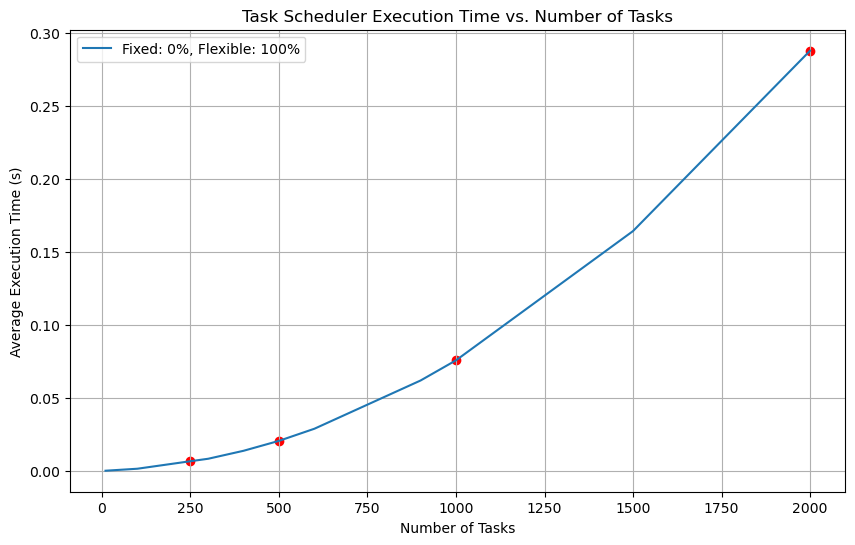

In [109]:
import time
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from queue import PriorityQueue

def simulate_scheduler(n_tasks, proportion_fixed, n_trials=5):
    execution_times = []
    for _ in range(n_trials):
        # Create tasks with the given proportion of fixed and flexible tasks
        tasks = []
        n_fixed = int(n_tasks * proportion_fixed)
        for i in range(n_tasks):
            if i < n_fixed:
                # Create a fixed time task
                tasks.append(Task(i, f"Task {i}", 30, [], start_time=i))
            else:
                # Create a flexible time task
                tasks.append(Task(i, f"Task {i}", 30, [], priority=0))
        
        scheduler = Silent_TaskScheduler(tasks)
        
        start_time = time.time()
        scheduler.run_task_scheduler()
        end_time = time.time()
        
        execution_times.append(end_time - start_time)
    
    # Return the average execution time
    return sum(execution_times) / len(execution_times)

# Parameters for the simulation
n_tasks_set = [10, 100, 250, 300, 400, 500, 600, 900, 1000, 1500, 2000]
proportion_fixed_set = [0]

# Storage for results
results = {proportion: [] for proportion in proportion_fixed_set}

# Run simulation
for proportion_fixed in proportion_fixed_set:
    for n_tasks in n_tasks_set:
        avg_time = simulate_scheduler(n_tasks, proportion_fixed)
        results[proportion_fixed].append(avg_time)
points_of_interest = [250, 500, 1000, 2000]

for proportion_fixed, times in results.items():
    print(f"\nProportion Fixed: {proportion_fixed*100}%")
    for point in points_of_interest:
        if point in n_tasks_set:
            index = n_tasks_set.index(point)
            execution_time = times[index]
            print(f"Tasks: {point}, Execution Time: {execution_time:.4f}s")
        else:
            print(f"Task count {point} not in n_tasks_set, unable to retrieve execution time.")

plt.figure(figsize=(10, 6))
for proportion_fixed, times in results.items():
    plt.plot(n_tasks_set, times, label=f"Fixed: {proportion_fixed*100}%, Flexible: {(1-proportion_fixed)*100}%")
    for point in points_of_interest:
        if point in n_tasks_set:
            index = n_tasks_set.index(point)
            plt.scatter([point], [times[index]], color='red')

plt.xlabel('Number of Tasks')
plt.ylabel('Average Execution Time (s)')
plt.title('Task Scheduler Execution Time vs. Number of Tasks')
plt.legend()
plt.grid(True)
plt.show()

## Benefits of my Algorithmic Strategy

#### 1. Efficient Management of Diverse Task Requirements: 
By separating tasks into fixed and flexible categories, I optimized scheduling efficiency. This allowed me to prioritize tasks with specific start times while filling available slots with flexible tasks, maximizing the scheduler's capacity and making the algorithm efficient.

#### 2. Utility Score Calculation:
I introduced a method to calculate utility scores based on academic and career importance, personal interest, and dependencies. I assigned different coefficient to each factors to ensure that the tasks are scheduled based on its dependencies and importance, enhancing the overall effectiveness of the scheduling process.

#### 3. Dynamic Rescheduling Based on Priorities: 
My scheduler dynamically adjusts schedules based on utility scores and task priorities, allowing for an adaptable and efficient system. This ensures tasks with higher utility are given precedence, optimizing productivity.

## Limitations and Potential Improvements

#### 1. Handling Collisions: 
Initially, my scheduler didn't account for collisions between fixed-time tasks. I attempted to address this by comparing utility scores of colliding fixed tasks (see below code). However, this code didn't work because run_task_scheduler calculate utility after scheduling the fixed-time task, as my utility formula depends on the priority order of fixed tasks. Because of this, if I run this code, the utility for the fixed task will be 0, which cannot be compared. A potential improvement would be to schedule the fixed task, calculate utility, delete colliding fixed tasks, re-calculate utility, and then schedule flexible tasks. However, I failed to do so because there were too many cases to consider after deleting the colliding tasks (e.g., dependencies) among fixed tasks and updating utility calculations.


In [19]:
    def schedule_fixed_time_tasks(self):
        priority_counter = len(self.fixed_time_tasks)  # Assuming this gives the number of tasks
        while self.fixed_time_tasks.heap_size > 0:
            task = self.fixed_time_tasks.heappop()
            task.priority = priority_counter
            # Decrease for the next task
            priority_counter -= 1
            # Check for collision with existing scheduled tasks
            collision = False
            for i, (start, end, scheduled_task_id) in enumerate(self.comprehensive_schedule):
                if task.start_time < end and (task.start_time + task.duration) > start:
                    collision = True
                    scheduled_task = self.tasks[scheduled_task_id]
                    # If the current task has higher utility, replace the scheduled task
                    if task.utility_score > scheduled_task.utility_score:
                        print(f"🚨 Task '{scheduled_task.description}' (Utility: {scheduled_task.utility_score}) cancelled due to lower utility than '{task.description}' (Utility: {task.utility_score}).")
                        scheduled_task.status = self.CANCELLED
                        self.comprehensive_schedule[i] = (task.start_time, task.start_time + task.duration, task.id)
                        task.status = self.COMPLETED
                    else:
                        print(f"🚨 Task '{task.description}' (Utility: {task.utility_score}) cancelled due to lower utility than '{scheduled_task.description}' (Utility: {scheduled_task.utility_score}).")
                        task.status = self.CANCELLED
                    break
            if not collision:
                # Record the scheduled start time and add task to schedule if no collision
                task.scheduled_start_time = task.start_time
                start_time_formatted = f"{task.scheduled_start_time // 60}:{task.scheduled_start_time % 60:02d}"
                print(f"✅ Adding Fixed Schedule... '{task.description}' at {start_time_formatted} for {task.duration} mins.")
                task.status = self.COMPLETED
                end_time = task.scheduled_start_time + task.duration
                self.comprehensive_schedule.append((task.scheduled_start_time, end_time, task.id))
            self.comprehensive_schedule.sort(key=lambda x: x[0])

#### 2. Managing 'Blank Space':
I didn't explicitly address the management of idle time between tasks, which could lead to potential inefficiencies. During the ideation process, I considered adding a 'splitable' task that could be performed in multiple different time intervals (e.g., 1 hour to 10 minutes and 50 minutes), but it required excessive computation time due to recursively comparing utility.

#### 3. Issue with Starting Too Early: 
My mechanism to prevent early task starts didn't account for dependencies. Specifically, if a fixed-time task that has dependent flexible task, the utility function raises an error because there is no priority assigned to its dependency (see below).

In [22]:
error_tasks = [
    Task(id=1, description="Reading books", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=2, personal_interest=4),
    Task(id=2, description="CS110 PCW", duration=110, dependencies=[], status="N", start_time=None, academic_career_importance=5, personal_interest=2),
    # Task 2 starts earlier than starting time, and error occurs
    Task(id=3, description="CS110 class", duration=90, dependencies=[2], status="N", start_time= 400, academic_career_importance=5, personal_interest=2),
    Task(id=4, description="Apply for internship", duration=60, dependencies=[], status="N", start_time=None, academic_career_importance=4, personal_interest=3),
    Task(id=5, description="Take shower", duration=30, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=1),
    Task(id=6, description="Tour East Side Gallery", duration=95, dependencies=[], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    Task(id=7, description="Write a reflection of East Side Gallery Tour", duration=60, dependencies=[6], status="N", start_time=None, academic_career_importance=1, personal_interest=5),
    # Task 8 starts earlier than starting time (no error)
    Task(id=8, description="CCP meeting with DEGIS", duration=30, dependencies=[], status="N", start_time=110, academic_career_importance=5, personal_interest=5)
]

scheduler = TaskScheduler(error_tasks)
scheduler.run_task_scheduler(starting_time=480)

🚨🚨 Task 'CCP meeting with DEGIS' scheduled too early (before starting time), so it is canceled 🚨🚨
🚨🚨 Task 'CS110 class' scheduled too early (before starting time), so it is canceled 🚨🚨
✅ Adding Flexible Schedule... 'Tour East Side Gallery' at 8:00 for 95 mins.
✅ Adding Flexible Schedule... 'CS110 PCW' at 9:35 for 110 mins.
✅ Adding Flexible Schedule... 'Apply for internship' at 11:25 for 60 mins.
✅ Adding Flexible Schedule... 'Reading books' at 12:25 for 60 mins.
✅ Adding Flexible Schedule... 'Write a reflection of East Side Gallery Tour' at 13:25 for 60 mins.
✅ Adding Flexible Schedule... 'Take shower' at 14:25 for 30 mins.

 🌟 Final Task Scheduling Results:
------------------------------
08:00 - 09:35: Task 6 ('Tour East Side Gallery') - Completed, Utility Score: 58.
09:35 - 11:25: Task 2 ('CS110 PCW') - Completed, Utility Score: 17.
11:25 - 12:25: Task 4 ('Apply for internship') - Completed, Utility Score: 15.
12:25 - 13:25: Task 1 ('Reading books') - Completed, Utility Score: 10.
1

TypeError: '>' not supported between instances of 'int' and 'NoneType'

## Video link: 
https://www.loom.com/share/3a291869c2004aff9f6ef2e589996250?sid=2822ad8c-1545-4539-afda-985ecba41cf0
##### I didn't add the last test case of "fixed-time task starts before starting time" due to the time limit

## AI Statement 
1. Formatting task table to markdown format
After creating the tasks for the outcome, I used ChatGPT to change the list of tasks into markdown format in order to enhance readability.

2. Proofreading the complexity
I double-checked the time complexity calculation with ChatGPT to ensure my calculation was correct. However, ChatGPT's answer was different, so I did not refer to its answer.

3. Spell Check
I gave the following prompt to ChatGPT: "Check only its grammar, without changing the content."

4. Idea for edge cases
After creating test cases by myself, I asked ChatGPT to provide extra edge cases and compared them with mine. With this method, I found out that my code does not resolve the limitation of the fixed time collision problem.

5. Debugging
I struggled with finding a bug in my data visualization, so I utilized ChatGPT to debug the code for the graph.

## LO

#### 1. #professionalism

I provided a thorough explanation of the AI statement and comprehensively answered all the questions. Additionally, I adhered to the formatting guidelines outlined in the CS1110 course guide for submission.
(30 words)

#### 2. #cs110_AlgoStratDataStruct

I explained how my algorithm works with a higher-level explanation, guiding through each step without technical jargon. Additionally, I provided a thorough explanation of the rationale behind using a priority queue. I also provided a detailed explanation of the utility function, emphasizing its vital role in assigning priority, especially focusing on why dependencies are included in the utility calculation.(59 words)

#### 3. #cs110_CodeReadability 

My code is correct and clear, with appropriate variable naming, comments, and docstrings. I added an appropriate amount of comments considering the audience of this assignment, avoiding explanations for every single detail. Additionally, I included assert statements for test cases and created a 'Silent_TaskScheduler' that doesn't print the entire task scheduler again, enhancing readability. (54 words)

#### 4. #cs110_ComplexityAnalysis 

I thoroughly conducted a time complexity analysis of my code, with a particular focus on scheduling both fixed and flexible tasks. I analyzed the best and worst cases of running the scheduler by explaining the mutually exclusive nature of these two scenarios. Additionally, I included a graph visualization of the execution, experimentally verifying the worst-case scenario to double-check it. I validated the quadratic scaling by obtaining specific input values. (69 words)

#### 5. #cs110_ComputationalCritique 

I explained the rationale behind using a priority queue for my scheduler, emphasizing its ability to flexibly choose priority. Additionally, I addressed the reason for employing two heaps, which serves to segregate fixed and flexible tasks. (36 words)

#### 6. #cs110_PythonProgramming

My code is clear and correct, generating schedules based on the provided tasks and automatically calculating utility. Additionally, I have incorporated features such as starting time and additional attributes for utility calculation, and I accounted for edge cases (e.g., no tasks) by raising a ValueError, going beyond the specified requirements. (51 words)

## HC

#### #organization

I organized my assignment for high readability and clear structure, utilizing markdown heading functions. Additionally, I created visualization graphs to support the analysis of time complexity. (26 words)


# References

1. CS110 Session 13 - [7.2] Heaps and priority queues PWC / in-class code